In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the movie data
movies = pd.read_csv('/content/Full_data_feature _only.csv')

# Load the ratings data
ratings = pd.read_csv('/content/Full_data_ratings.csv')
#ratings.head(20)
# Pivot the ratings data to get a matrix of users vs movies
ratings_matrix = pd.pivot_table(ratings, values=['rating','price_level','user_ratings_total','store_Id','user_id'], index='store_Id', columns='user_id')
#print(ratings_matrix)

# Replace missing values with 0
ratings_matrix = ratings_matrix.fillna(0)
#print(ratings_matrix)

# Standardize the ratings matrix
X = (ratings_matrix - np.mean(ratings_matrix, axis=0)) / np.std(ratings_matrix, axis=0)
# Replace missing values with the 0 of each column
X = X.fillna(0)
#print(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the store data
movies['cluster'] = labels

# Print the top 5 movies in each cluster
for i in range(5):
    cluster_movies = movies[movies['cluster'] == i]['name'].values[:5]
    print(f'Cluster {i}: {cluster_movies}')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: ['Dr. Ralph P. Stocker, MD' 'The Klein Memorial Auditorium' 'GRM Music']
Cluster 1: ['West Haven' 'Dr. Pietro A. Memmo, MD' 'Cigna' 'Greenwood Lee H MD'
 'Ocean Community YMCA - Naik Family Branch Mystic']
Cluster 2: ['RE/MAX Coast and Country' 'Greenwood Lee H MD' 'Toads Place']
Cluster 3: ['American Medical Response' 'City Point Historic District']
Cluster 4: ['West Haven' 'Hilton Garden Inn Milford'
 'Hyatt Place Milford / New Haven'
 'Courtyard by Marriott New Haven Orange/Milford' 'Hampton Inn Milford']


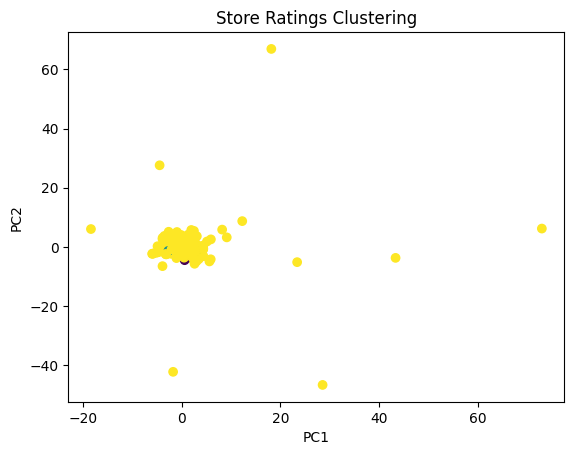

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points with different colors representing different clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Store Ratings Clustering')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

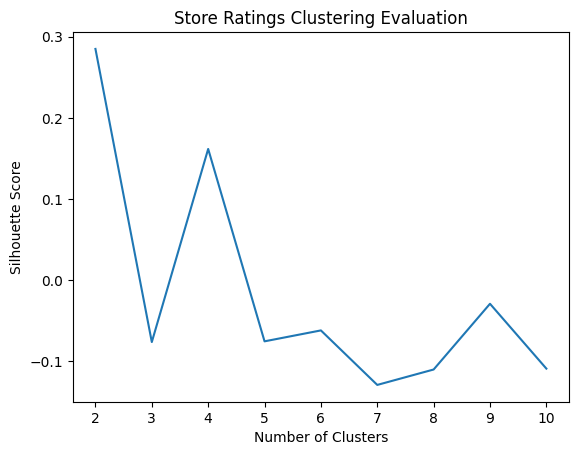

In [23]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score for different numbers of clusters
silhouette_scores= []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Store Ratings Clustering Evaluation')
plt.show()